In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as signal

from numpy import pi, sin
from scipy.signal import freqz

plt.rcParams.update({"axes.grid": True, "font.size": 14})

Exemplo 5.2

Projete um filtro que satisfaça as especificações a seguir:

- $M = 50$
- $\Omega_{c1} = π/4 $ rad/s
- $\Omega_{c2} = π/2 $ rad/s
- $\Omega_{s} = 2π   $ rad/s

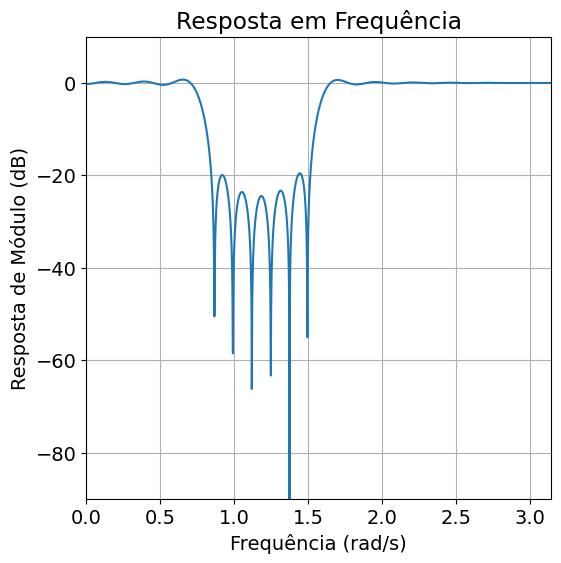

In [17]:
M = 50
Omega_c1 = pi / 4
Omega_c2 = pi / 2

ws = 2 * pi
wc1 = Omega_c1 * 2 * pi / ws
wc2 = Omega_c2 * 2 * pi / ws

n = np.arange(1, M / 2 + 1)

h0 = 1 - (wc2 - wc1) / pi
haux = (sin(wc1 * n) - sin(wc2 * n)) / (pi * n)
h = np.concatenate((haux[::-1], [h0], haux))

w, H = freqz(h, 1, 2048)

fig, ax = plt.subplots(1, 1, figsize=(6, 6))

ax.plot(w, 20 * np.log10(np.abs(H)))

ax.set_xlim(0, ws / 2)
ax.set_ylim(-90, 10)

ax.set_ylabel("Resposta de Módulo (dB)")
ax.set_xlabel("Frequência (rad/s)")
ax.set_title("Resposta em Frequência")

plt.show()

<!-- EXEMPLO 5.3
Projete um filtro rejeita-faixa que satisfaça as especificações a seguir usando as janelas retangular, de
Hamming, de Hann e de Blackman:
M = 80 Ωc1 = 2000 rad/s Ωc2 = 4000 rad/s Ωs = 10 000 rad/s  -->

Exemplo 5.3

Projete um filtro rejeita-faixa que satisfaça as especificações a seguir usando as janelas retangular, de Hamming, de Hanning e de Blackman:

- $M = 80$
- $\Omega_{c1} = 2000$ rad/s
- $\Omega_{c2} = 4000$ rad/s
- $\Omega_{s} = 10 000$ rad/s

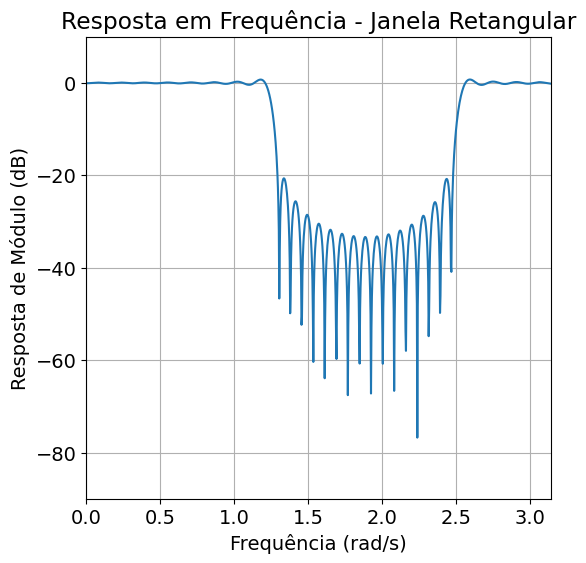

In [38]:
M = 80
Omega_c1 = 2000
Omega_c2 = 4000
Omega_s = 10000

wc1 = Omega_c1 * 2 * pi / Omega_s
wc2 = Omega_c2 * 2 * pi / Omega_s

n = np.arange(1, M / 2 + 1)

h0 = 1 - (wc2 - wc1) / pi
haux = (sin(wc1 * n) - sin(wc2 * n)) / (pi * n)
h_ideal = np.concatenate((haux[::-1], [h0], haux))
h_ret = h_ideal
w, H_ret = freqz(h_ret, 1, 2048, Omega_s)

fig, ax = plt.subplots(1, 1, figsize=(6, 6))

ax.plot(w, 20 * np.log10(np.abs(H_ret)))

ax.set_xlim(0, ws / 2)
ax.set_ylim(-90, 10)

ax.set_ylabel("Resposta de Módulo (dB)")
ax.set_xlabel("Frequência (rad/s)")
ax.set_title("Resposta em Frequência - Janela Retangular")

plt.show()

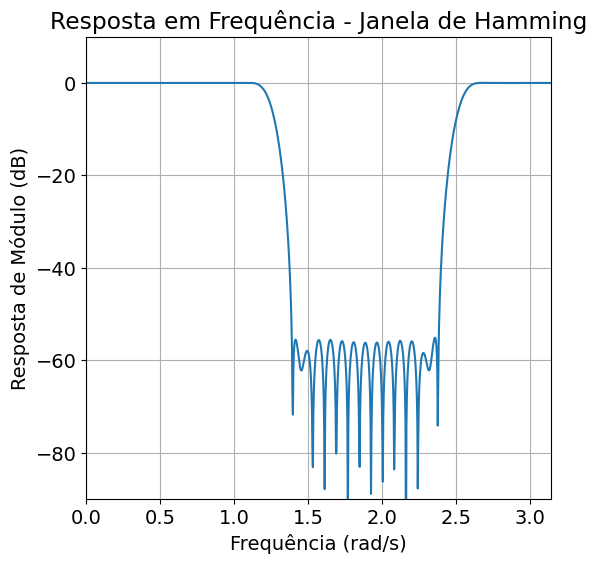

In [42]:
h_aux = signal.windows.hamming(M + 1)
h_ham = h_ideal * h_aux
w, H_ham = freqz(h_ham, 1, 2048, Omega_s)

fig, ax = plt.subplots(1, 1, figsize=(6, 6))

ax.plot(w, 20 * np.log10(np.abs(H_ham)))

ax.set_xlim(0, ws / 2)
ax.set_ylim(-90, 10)

ax.set_ylabel("Resposta de Módulo (dB)")
ax.set_xlabel("Frequência (rad/s)")
ax.set_title("Resposta em Frequência - Janela de Hamming")

plt.show()

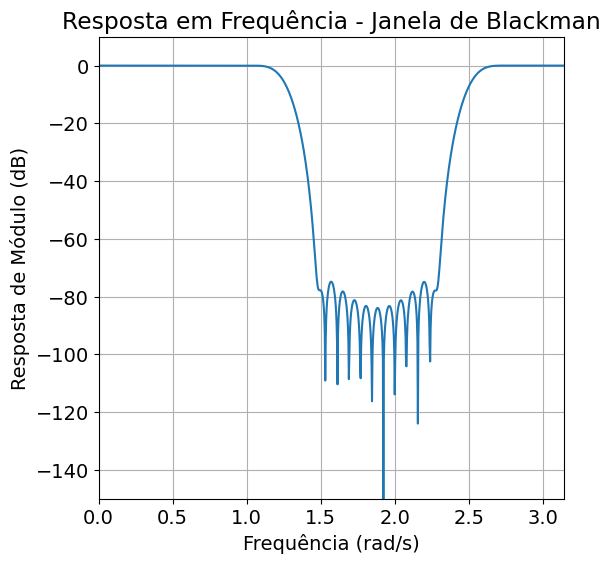

In [46]:
h_aux = signal.windows.blackman(M + 1)
h_black = h_ideal * h_aux
w, H_black = freqz(h_black, 1, 2048, Omega_s)

fig, ax = plt.subplots(1, 1, figsize=(6, 6))

ax.plot(w, 20 * np.log10(np.abs(H_black)))

ax.set_xlim(0, ws / 2)
ax.set_ylim(-150, 10)

ax.set_ylabel("Resposta de Módulo (dB)")
ax.set_xlabel("Frequência (rad/s)")
ax.set_title("Resposta em Frequência - Janela de Blackman")

plt.show()

Exemplo 5.4

Projete um filtro rejeita-faixa que satisfaça as especificações a seguir, usando a janela de Kaiser:

- $Ap = 1,0$ dB
- $Ar = 45$ dB
- $\Omega_{p1} = 800$ Hz
- $\Omega_{r1} = 950$ Hz
- $\Omega_{r2} = 1050$ Hz
- $\Omega_{p2} = 1200$ Hz
- $\Omega_{s} = 6000$ Hz

In [55]:
# Ap = 1;
# Ar = 45;
# Omega_p1 = 800;
# Omega_r1 = 950;
# Omega_r2 = 1050;
# Omega_p2 = 1200;
# Omega_s = 6000;
# delta_p = (10^(0.05*Ap) - 1)/(10^(0.05*Ap) + 1);
# delta_r = 10^(-0.05*Ar);
# F = [Omega_p1 Omega_r1 Omega_r2 Omega_p2];
# A = [1 0 1];
# ripples = [delta_p delta_r delta_p];
# [M,Wn,beta,FILTYPE] = kaiserord(F,A,ripples,Omega_s);
# kaiser_win = kaiser(M+1,beta);
# h = fir1(M,Wn,FILTYPE,kaiser_win,'noscale');
# figure(1)
# stem(0:M,h)
# ylabel('h[n]');
# xlabel('n)');
# title('Resposta ao Impulso');

Ap = 1
Ar = 45

Omega_p1 = 800
Omega_r1 = 950
Omega_r2 = 1050
Omega_p2 = 1200
Omega_s = 6000

delta_p = (10 ** (0.05 * Ap) - 1) / (10 ** (0.05 * Ap) + 1)
delta_r = 10 ** (-0.05 * Ar)

F = [Omega_p1, Omega_r1, Omega_r2, Omega_p2]
A = [1, 0, 1]
ripples = [delta_p, delta_r, delta_p]

M, Wn, beta = signal.kaiserord(0.5, F)
kaiser_win = signal.windows.kaiser(M + 1, beta)
h = signal.firwin(M, Wn, window=kaiser_win, scale=False)

fig, ax = plt.subplots(1, 1, figsize=(6, 6))

ax.stem(np.arange(0, M + 1), h)

ax.set_ylabel("h[n]")
ax.set_xlabel("n")
ax.set_title("Resposta ao Impulso")

plt.show()

TypeError: can't multiply sequence by non-int of type 'float'